In [209]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import widgets
from IPython.display import display
import matplotlib.pyplot as plt

## Loading Data

In [210]:
df = pd.read_csv('data/ratings.csv') 
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [211]:
movie_titles = pd.read_csv('data/movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [212]:
x = pd.merge(df, movie_titles, on='movieId')
x.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [213]:
ratings = pd.DataFrame(x.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.748387
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091


In [214]:
ratings['number_of_ratings'] = x.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",2.748387,155
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55


## Rating vs Number of Ratings. Most of the ratings are 2.5 to 4

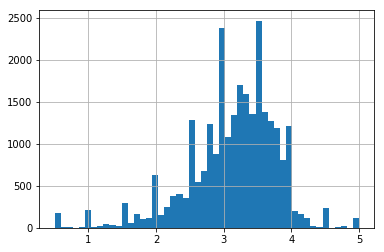

In [215]:
%matplotlib inline
ratings['rating'].hist(bins=50)

## Number of ratings per movie

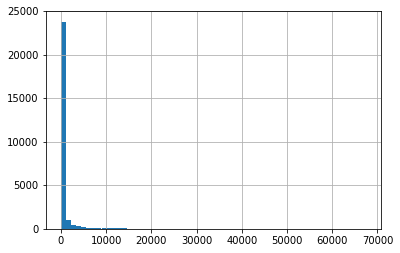

In [216]:
ratings['number_of_ratings'].hist(bins=60)

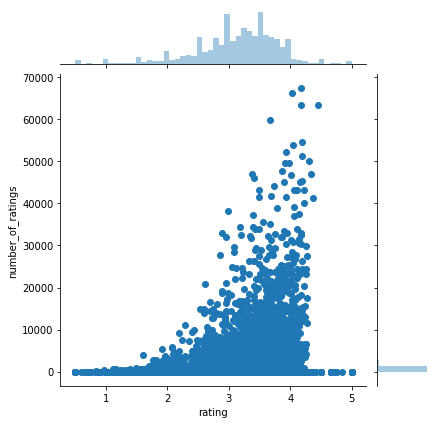

In [217]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [218]:
movie_matrix = x.pivot_table(index='userId', columns='title', values='rating')

## Most Rated Movies

In [219]:
ratings = ratings.sort_values('number_of_ratings', ascending=False)
optionsList = np.asarray(movie_titles.title)

In [220]:
dd1 = widgets.Dropdown(
    options=optionsList,
    value=optionsList[1],
    description='First Movie:',
    disabled=False,
)


end = widgets.Button(
    description='Done',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click when selection finished',
    icon='check'
)


display(dd1)
display(end)
end.on_click(on_button_clicked)


def on_button_clicked(b):
    print("Movie Selected")

Dropdown(description='First Movie:', index=1, options=('Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men…

Button(description='Done', icon='check', style=ButtonStyle(), tooltip='Click when selection finished')

Movie Selected


## Calculating Correlation coefficent of selected movie pairs and arranging them in order of number of ratings and filtering out the ones with less than 100 ratings. Top 10 out of those are our recommendations

In [221]:
#dd1.value = 'Air Force One (1997)'
muv1_user_rating = movie_matrix[dd1.value]
similar_to_muv1=movie_matrix.corrwith(muv1_user_rating)

corr_muv1 = pd.DataFrame(similar_to_muv1, columns=['correlation'])
corr_muv1.dropna(inplace=True)
corr_muv1.sort_values(by=['correlation'],ascending = False)
corr_muv1 = corr_muv1.join(ratings['number_of_ratings'])

recommend = corr_muv1[corr_muv1['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(11)
recommend = recommend.iloc[1:]
recommend = recommend.drop(['correlation', 'number_of_ratings'], axis=1)
print("If you liked ",dd1.value, " then you may also like:")
recommend

If you liked  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  then you may also like:


""
title
Murphy's War (1971)
Into the West (1992)
"Day After, The (1983)"
Body and Soul (1947)
Geri's Game (1997)
Anne of Green Gables: The Sequel (a.k.a. Anne of Avonlea) (1987)
Cannibal! The Musical (a.k.a. Alferd Packer: The Musical) (1996)
To End All Wars (2001)
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)
